In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
#%matplotlib inline
import seaborn as sns

In [2]:
data = {"A": [1, 1, 2, 2],
        "B": [1, 2, 3, 4],
        "C": [0.362838, 0.227877, 1.267767, -0.562860]}
df = pd.DataFrame(data)
df

,A,B,C
0,1,1,0.362838
1,1,2,0.227877
2,2,3,1.267767
3,2,4,-0.562860


In [3]:
pref_1 = df.loc[1, :].values

In [4]:
pref_1

array([1.      , 2.      , 0.227877])

In [5]:
df

,A,B,C
0,1,1,0.362838
1,1,2,0.227877
2,2,3,1.267767
3,2,4,-0.562860


In [6]:
hp= df.groupby('A').agg('min')

In [7]:
hp

,B,C
A,,
1,1,0.227877
2,3,-0.562860


In [8]:
hp.head()

,B,C
A,,
1,1,0.227877
2,3,-0.562860


In [9]:
hp.columns

Index(['B', 'C'], dtype='object')

In [10]:
#hp.columns.set_levels(['max_qty', 'min_qty'], inplace = True)

In [11]:
dict = {'B': 'B_min',
        'C': 'C_min'
       }
# call rename () method
hp.rename(columns=dict,
          inplace=True)

In [12]:
hp

,B_min,C_min
A,,
1,1,0.227877
2,3,-0.562860


In [13]:
display(hp)

,B_min,C_min
A,,
1,1,0.227877
2,3,-0.562860


In [14]:
ph= df.groupby('A').B.mean()

In [15]:
ph

A
1    1.5
2    3.5
Name: B, dtype: float64

In [16]:
ph= df.groupby('A').B.mean().reset_index()

In [17]:
ph

,A,B
0,1,1.5
1,2,3.5


In [18]:
dict = {'B': 'B_min',
        'A': 'A_Aggr'
       }
# call rename () method
ph.rename(columns=dict,
          inplace=True)

In [19]:
ph

,A_Aggr,B_min
0,1,1.5
1,2,3.5


In [20]:
ph = ph.sort_values(by='B_min', ascending=False)
ph

,A_Aggr,B_min
1,2,3.5
0,1,1.5


In [21]:
#ph= ph.reset_index()
#ph

In [22]:
ph = ph.head(1)

In [23]:
ph

,A_Aggr,B_min
1,2,3.5


In [24]:
dat = {"title": ["je suis","trois poissons","les autres","je suis", "trois poissons","je suis"],
        "rating": [4, 2, 1, 2, 5, 3],
        "user_id": ["5d09dfe23", "5d09dfe89", "5d09dfop","5d09df21jhg", "5d09ddfgop", "5d09df21jhg"]}
dat_df = pd.DataFrame(dat)

In [25]:
dat_df.head(6)

,title,rating,user_id
0,je suis,4,5d09dfe23
1,trois poissons,2,5d09dfe89
2,les autres,1,5d09dfop
3,je suis,2,5d09df21jhg
4,trois poissons,5,5d09ddfgop
5,je suis,3,5d09df21jhg


In [26]:
livre_stats = dat_df.groupby('title')['rating'].agg(['count', 'mean']).reset_index()

In [27]:
livre_stats

,title,count,mean
0,je suis,3,3.0
1,les autres,1,1.0
2,trois poissons,2,3.5


In [28]:
C = livre_stats['count'].mean()
C

2.0

In [29]:
M = livre_stats['mean'].mean()
M

2.5

In [30]:
dat_df.sum()

title      je suistrois poissonsles autresje suistrois po...
rating                                                    17
user_id    5d09dfe235d09dfe895d09dfop5d09df21jhg5d09ddfgo...
dtype: object

In [31]:
dat_df.count()

title      6
rating     6
user_id    6
dtype: int64

In [32]:
def bayesian_avg(df):
    return (C * M + df.sum()) / (C + df.count())

In [33]:
bayesian_avg_ratings = dat_df.groupby('title')['rating'].agg(bayesian_avg).reset_index()
bayesian_avg_ratings

,title,rating
0,je suis,2.8
1,les autres,2.0
2,trois poissons,3.0


In [34]:
bayesian_avg_ratings.columns = ['title', 'bayesian_avg']

In [35]:
bayesian_avg_ratings

,title,bayesian_avg
0,je suis,2.8
1,les autres,2.0
2,trois poissons,3.0


In [36]:
book_stats = livre_stats.merge(bayesian_avg_ratings, on='title').sort_values('bayesian_avg', ascending=False)
book_stats

,title,count,mean,bayesian_avg
2,trois poissons,2,3.5,3.0
0,je suis,3,3.0,2.8
1,les autres,1,1.0,2.0


In [37]:
best_rated_books = book_stats[['title', 'bayesian_avg']].head(2)

In [38]:
best_rated_books

,title,bayesian_avg
2,trois poissons,3.0
0,je suis,2.8


Text(0.5, 0, 'Note moyenne')

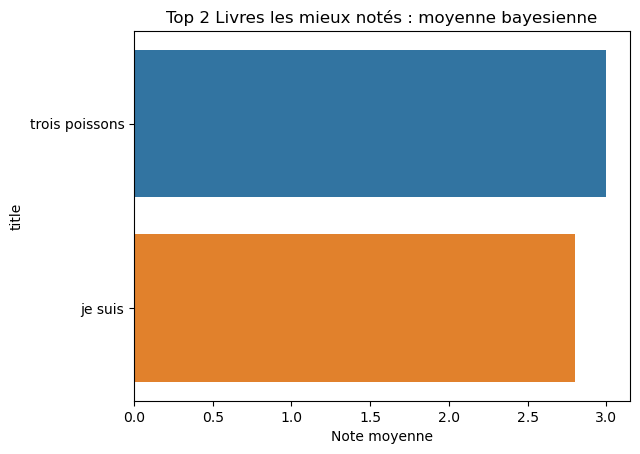

In [39]:
sns.barplot(y='title', x='bayesian_avg', data=best_rated_books, orient = 'h')
plt.title(f'Top 2 Livres les mieux notés : moyenne bayesienne')
plt.xlabel("Note moyenne")

In [40]:
dg = pd.DataFrame({'A': ["je", "je","le"], 'B': [4, 1, 1]})


In [41]:
dg

,A,B
0,je,4
1,je,1
2,le,1


In [42]:
dg.A.nunique(dropna=True)

2

In [43]:
dg1 = dg.index

In [44]:
dg1

RangeIndex(start=0, stop=3, step=1)

In [45]:
dg1 = dg1.tolist()

In [46]:
dg1

[0, 1, 2]

In [47]:
dg2 = dg.columns.tolist()

In [48]:
dg2

['A', 'B']

In [49]:
   # to_predict = mat_ratings.loc[user_id][mat_ratings.loc[user_id]==0]

In [50]:
df = pd.DataFrame([[1, 2], [4, 5], [7, 8]],
                  index=['cobra', 'viper', 'sidewinder'],
                  columns=['max_speed', 'shield'])
df

,max_speed,shield
cobra,1,2
viper,4,5
sidewinder,7,8


In [51]:
df.loc['viper']

max_speed    4
shield       5
Name: viper, dtype: int64

In [52]:
df.loc[['viper', 'sidewinder']]

,max_speed,shield
viper,4,5
sidewinder,7,8


In [53]:
[(df.loc['viper']==4) | (df.loc['viper']==5)]

[max_speed    True
 shield       True
 Name: viper, dtype: bool]

In [54]:
df.loc['viper']

max_speed    4
shield       5
Name: viper, dtype: int64

In [55]:
to_predict = df.loc['viper'][(df.loc['viper']==4) | (df.loc['viper']==5)]
to_predict

max_speed    4
shield       5
Name: viper, dtype: int64

In [56]:
to_predict.index

Index(['max_speed', 'shield'], dtype='object')

In [57]:
 # to_predict = mat_ratings.loc[user_id][mat_ratings.loc[user_id]==0]

In [165]:
import numpy as np
from sklearn.cluster import KMeans


from scipy.cluster import hierarchy
import matplotlib.pyplot as plt



In [166]:
#x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]

In [167]:
#y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

In [168]:
#data = pd.DataFrame({'Name': [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12],
                   #'Age': [21, 19, 24, 17, 16, 25, 24, 22, 21, 21],},
                 # index=([10, 20, 30]))

In [169]:
data = pd.DataFrame({'Name': [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12],
                   'Age': [21, 19, 24, 17, 16, 25, 24, 22, 21, 21],})

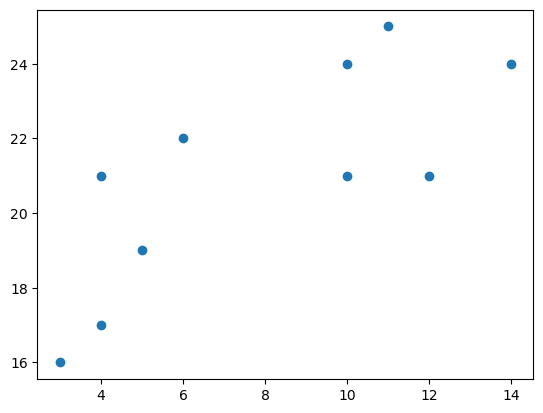

In [170]:
plt.scatter(data.Name, data.Age)
plt.show()

In [171]:
#data = list(zip(x, y))

In [172]:
data

,Name,Age
0,4,21
1,5,19
2,10,24
3,4,17
4,3,16
5,11,25
6,14,24
7,6,22
8,10,21
9,12,21


In [173]:
#data = pd.DataFrame(data)


In [174]:
data.index.values

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

C:\Users\thfam\anaconda3\envs\Projet_accidents_routiers\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\thfam\anaconda3\envs\Projet_accidents_routiers\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


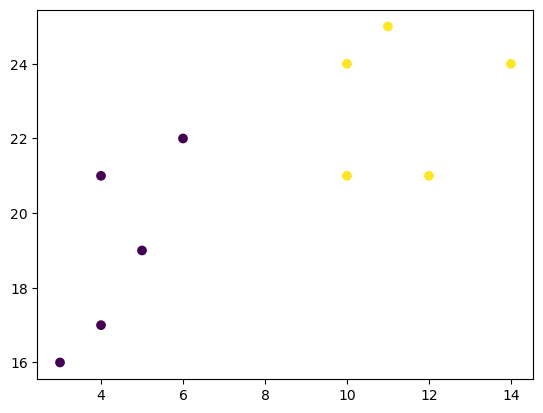

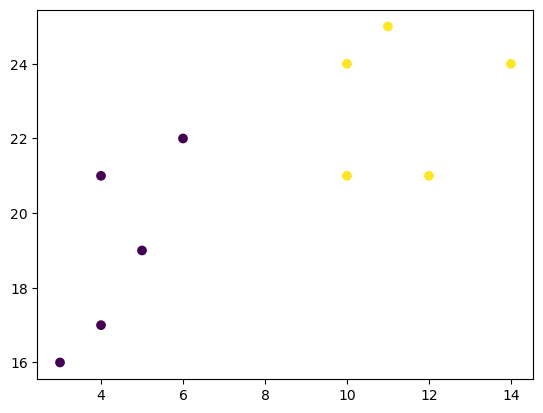

In [177]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

plt.scatter(data.Name, data.Age, c=kmeans.labels_)
plt.show()
plt.scatter(x, y, c=kmeans.labels_)
plt.show()

In [178]:
#data = {'A': [1, 2, 3], 'B': [4, 5, 6]}
#df = pd.DataFrame(data)

# Accéder aux index du DataFrame
#index_values = df.index.tolist()

# Afficher les index
#print(index_values)

In [179]:
# Assuming you have your dataset stored in a variable named 'data'
# Replace 'data' with your actual dataset variable name
# Also assuming you have determined the number of clusters 'k'
# Initialize KMeans model with desired number of clusters

#kmeans = KMeans(n_clusters = k)

# Fit KMeans model to the data
#kmeans.fit(data)


In [180]:
# Get cluster labels for each data point
cluster_labels = kmeans.labels_

In [181]:
cluster_labels

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1])

In [182]:
# Associate each observation with its respective cluster
clusters = {}
for i, label in enumerate(cluster_labels):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(data.index.values[i])

# Now 'clusters' dictionary contains the observations associated with each cluster

In [183]:
clusters

{0: [0, 1, 3, 4, 7], 1: [2, 5, 6, 8, 9]}

In [184]:
clusters.items()

dict_items([(0, [0, 1, 3, 4, 7]), (1, [2, 5, 6, 8, 9])])

In [188]:
data['Cluster'] = None

# Parcourir les observations et mettre à jour la colonne 'Cluster' avec l'identifiant du cluster
for label, observations in clusters.items():
    data.loc[data.index.isin(observations), 'Cluster'] = label

In [189]:
data

,Name,Age,Cluster
0,4,21,0
1,5,19,0
2,10,24,1
3,4,17,0
4,3,16,0
5,11,25,1
6,14,24,1
7,6,22,0
8,10,21,1
9,12,21,1


In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     10 non-null     int64 
 1   Age      10 non-null     int64 
 2   Cluster  10 non-null     object
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [157]:
list_clusters = list(clusters.values())

In [159]:
list_clusters.tolist()

AttributeError: 'list' object has no attribute 'tolist'

In [155]:
dataCluster = pd.DataFrame(clusters)
dataCluster

,0,1
0,0,2
1,1,5
2,3,6
3,4,8
4,7,9


In [156]:
 clusters[0]

[0, 1, 3, 4, 7]

In [59]:
# Exemple de données
data = np.random.rand(20, 2)



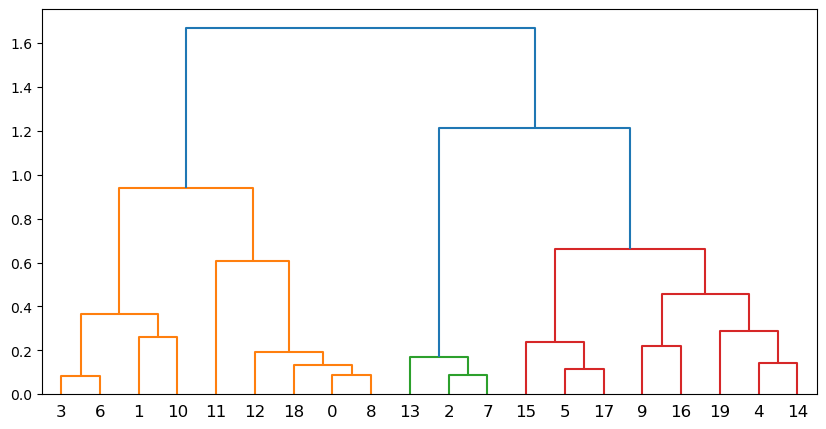

In [60]:
# Construction du dendrogramme
Z = hierarchy.linkage(data, method='ward')
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z)


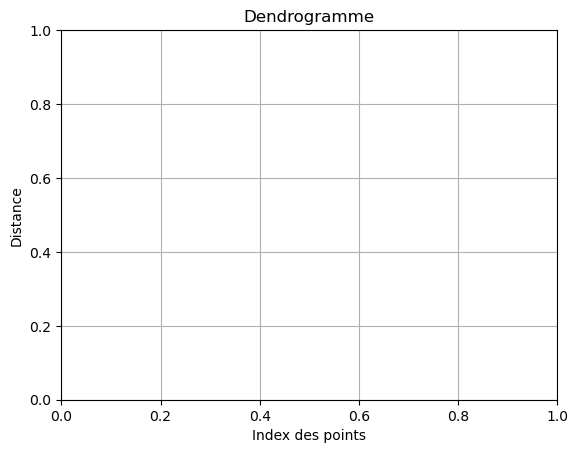

In [61]:

# Recherche du coude
plt.xlabel('Index des points')
plt.ylabel('Distance')
plt.title('Dendrogramme')
plt.grid(True)
plt.show()